In [40]:
# read files
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
sc.settings.set_figure_params(dpi=80, facecolor='white')
import matplotlib.pyplot as plt


sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()



scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.6 louvain==0.7.0 pynndescent==0.5.4


In [41]:
adata_ctrl = sc.read_10x_mtx('./DKK2_CTRL_T/',  cache=True)
adata_KO = sc.read_10x_mtx('./DKK2_KO_T/',  cache=True)


... reading from cache file cache/DKK2_CTRL_T-matrix.h5ad
... reading from cache file cache/DKK2_KO_T-matrix.h5ad


In [42]:
adata_KO.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`
adata_ctrl.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`


normalizing counts per cell
    finished (0:00:00)


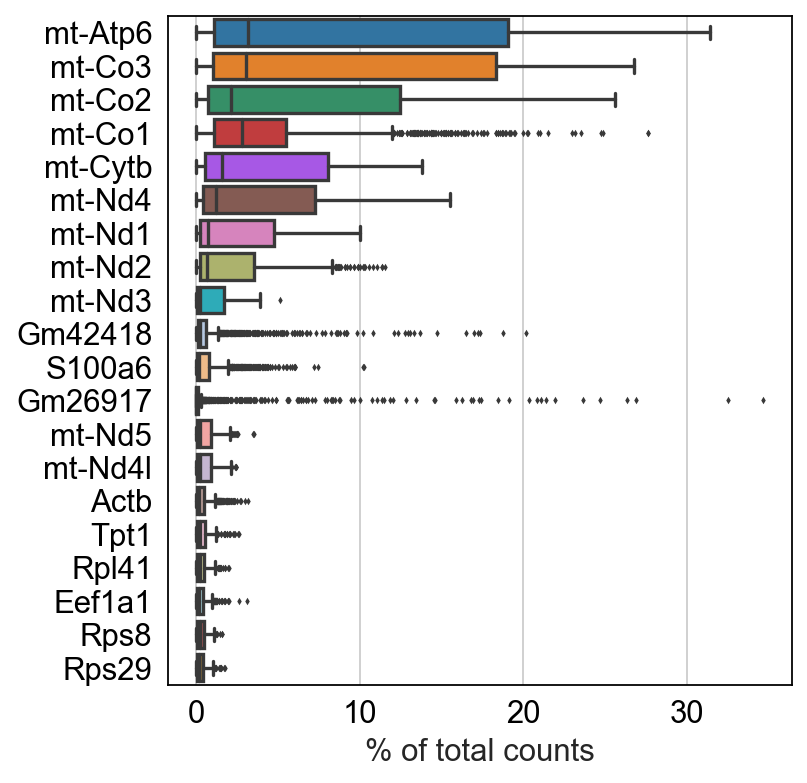

In [43]:
sc.pl.highest_expr_genes(adata_KO, n_top=20, )

In [44]:
def ribo_mt(a_data):
        # mitochondrial genes
    a_data.var['mt'] = a_data.var_names.str.startswith('mt-') 
    # ribosomal genes
    a_data.var['ribo'] = a_data.var_names.str.startswith(("Rps","Rpl"))
    sc.pp.calculate_qc_metrics(a_data, qc_vars=['mt','ribo'], percent_top=None, log1p=False, inplace=True)
    
    

In [45]:
adata_KO

AnnData object with n_obs × n_vars = 1902 × 31056
    var: 'gene_ids', 'feature_types'

In [19]:
ribo_mt(adata_KO)

In [20]:
adata_KO.var

,gene_ids,feature_types,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
Xkr4,ENSMUSG00000051951,Gene Expression,False,False,31,0.019453,98.370137,37.0
Gm1992,ENSMUSG00000089699,Gene Expression,False,False,0,0.000000,100.000000,0.0
Gm37381,ENSMUSG00000102343,Gene Expression,False,False,1,0.000526,99.947424,1.0
Rp1,ENSMUSG00000025900,Gene Expression,False,False,12,0.008412,99.369085,16.0
Sox17,ENSMUSG00000025902,Gene Expression,False,False,191,0.387487,89.957939,737.0
...,...,...,...,...,...,...,...,...
Vmn2r122,ENSMUSG00000096730,Gene Expression,False,False,0,0.000000,100.000000,0.0
CAAA01147332.1,ENSMUSG00000095742,Gene Expression,False,False,81,0.043638,95.741325,83.0
GFP,GFP,Gene Expression,False,False,0,0.000000,100.000000,0.0
Malat1-1,Malat1,Gene Expression,False,False,338,0.254469,82.229232,484.0


... storing 'feature_types' as categorical


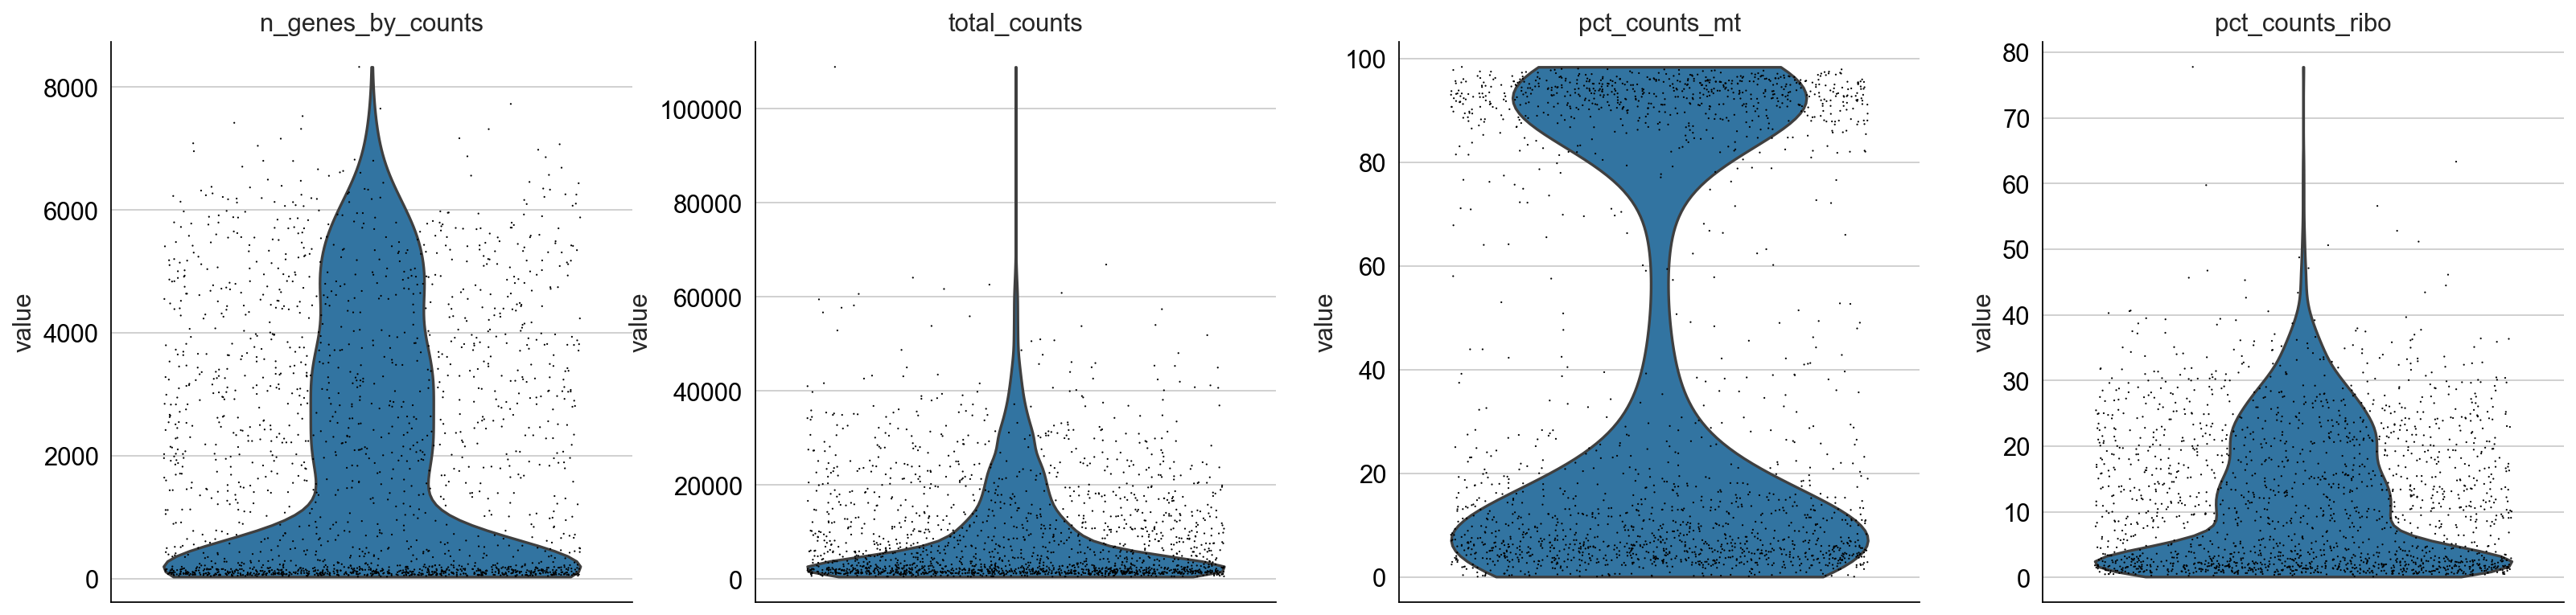

In [21]:
sc.pl.violin(adata_KO, ['n_genes_by_counts', 'total_counts','pct_counts_mt','pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

In [22]:
sns.set_style('darkgrid')


In [23]:
sns.set_style('darkgrid')


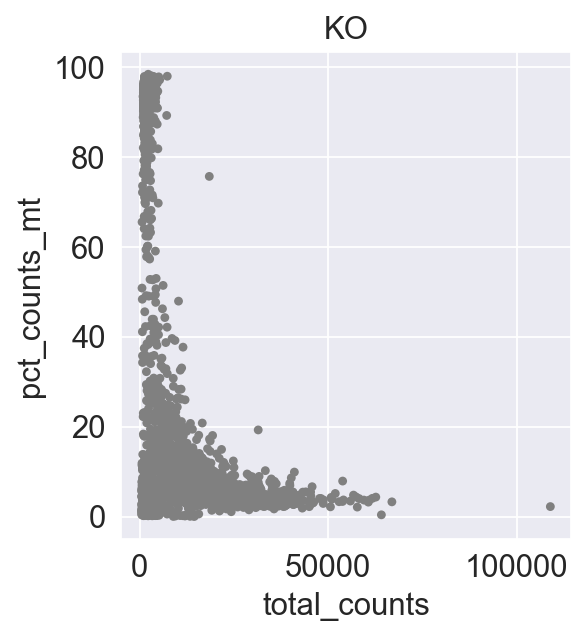

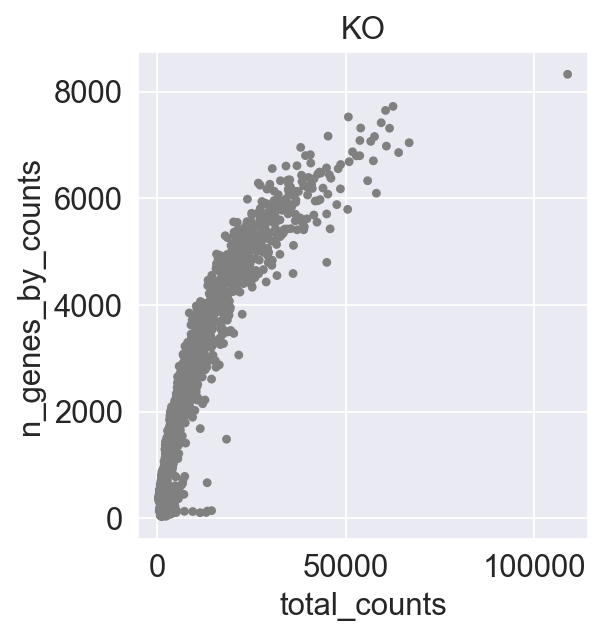

In [24]:
sc.pl.scatter(adata_KO, x='total_counts', y='pct_counts_mt', title = 'KO')
sc.pl.scatter(adata_KO, x='total_counts', y='n_genes_by_counts', title = 'KO')

Text(0.5, 1.0, 'nFeature_KO')

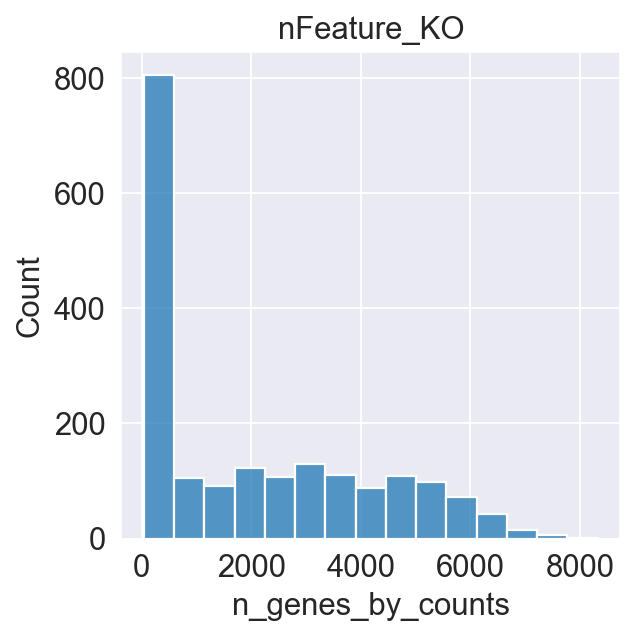

In [25]:
sns.set_style('darkgrid')


sns.histplot(adata_KO.obs['n_genes_by_counts'])
plt.title('nFeature_KO')

Text(0.5, 1.0, 'total_counts_KO')

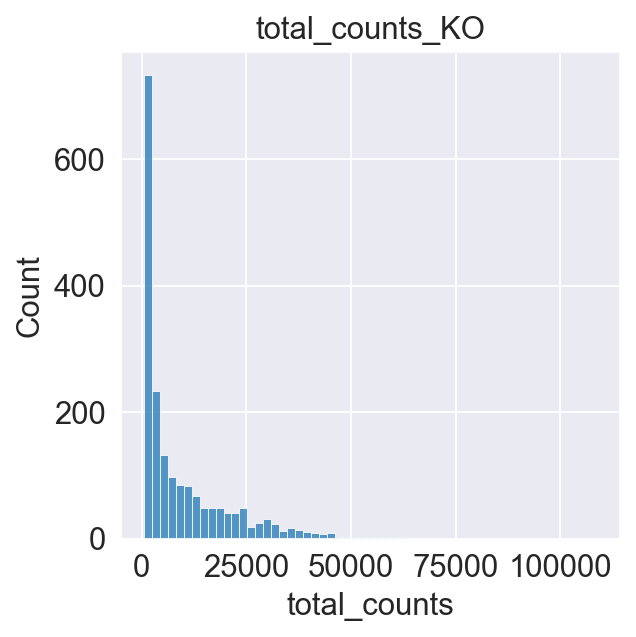

In [26]:
sns.set_style('darkgrid')


sns.histplot(adata_KO.obs['total_counts'])
plt.title('total_counts_KO')

In [27]:
sc.pp.filter_cells(adata_KO, min_genes=200)

filtered out 639 cells that have less than 200 genes expressed


Text(0.5, 1.0, 'total_counts_KO')

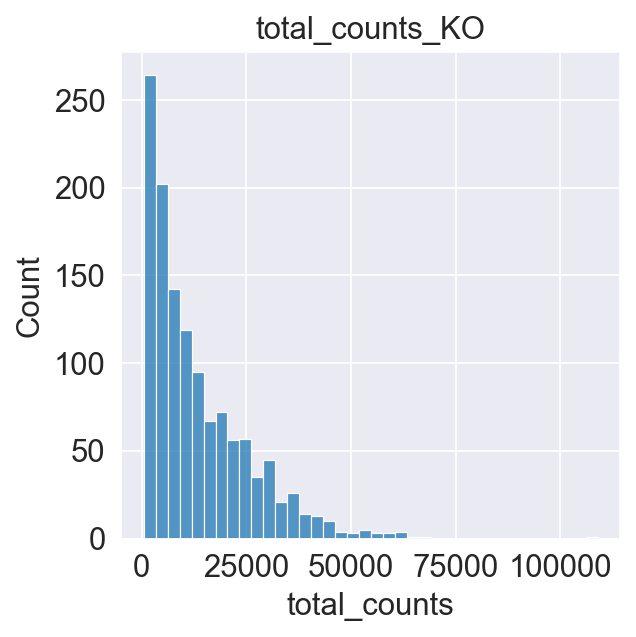

In [28]:
sns.set_style('darkgrid')


sns.histplot(adata_KO.obs['total_counts'])
plt.title('total_counts_KO')

Text(0.5, 1.0, 'nFeature_KO')

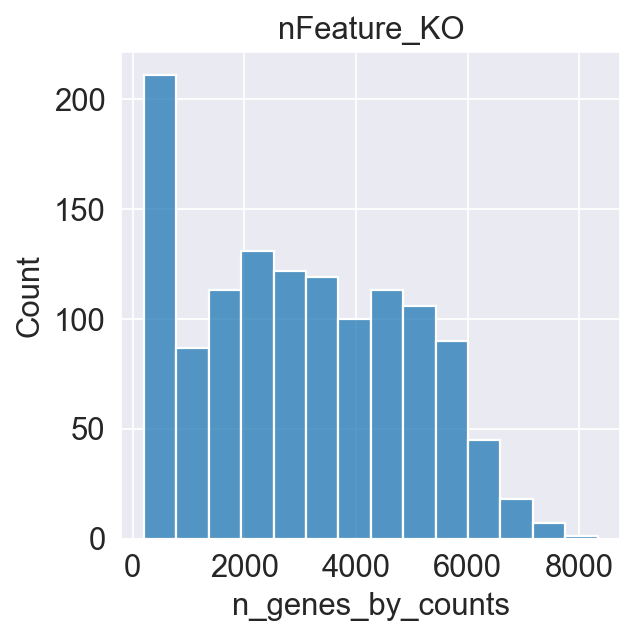

In [29]:
sns.set_style('darkgrid')


sns.histplot(adata_KO.obs['n_genes_by_counts'])
plt.title('nFeature_KO')


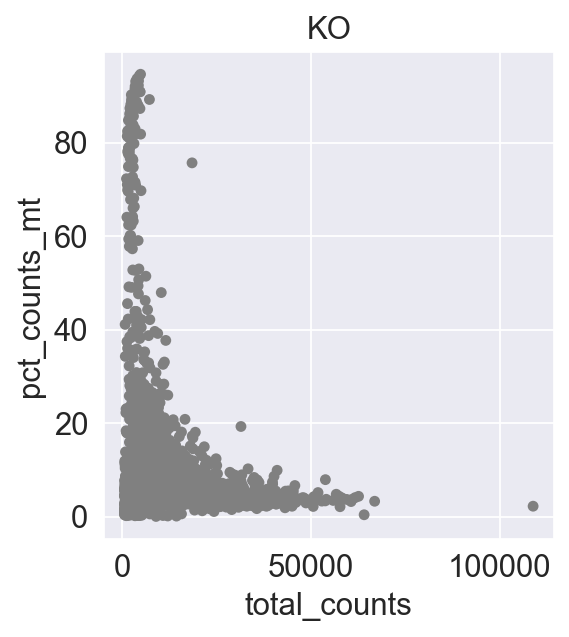

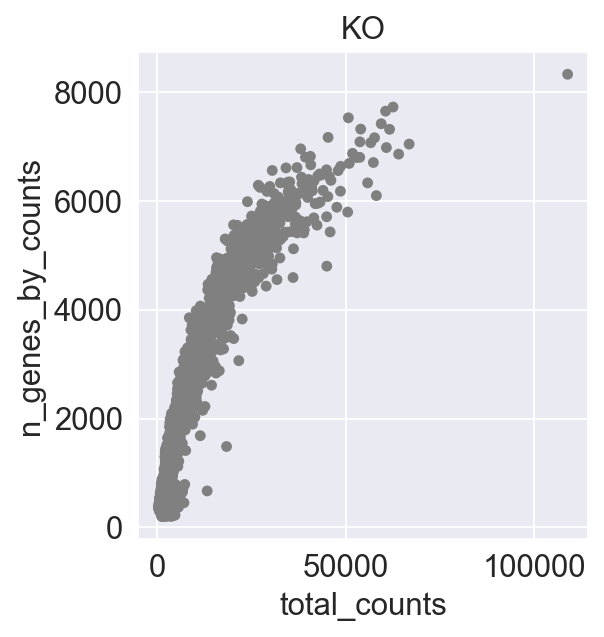

In [30]:
sc.pl.scatter(adata_KO, x='total_counts', y='pct_counts_mt', title = 'KO')
sc.pl.scatter(adata_KO, x='total_counts', y='n_genes_by_counts', title = 'KO')

In [31]:
adata_KO = adata_KO[adata_KO.obs.pct_counts_mt < 50, :]


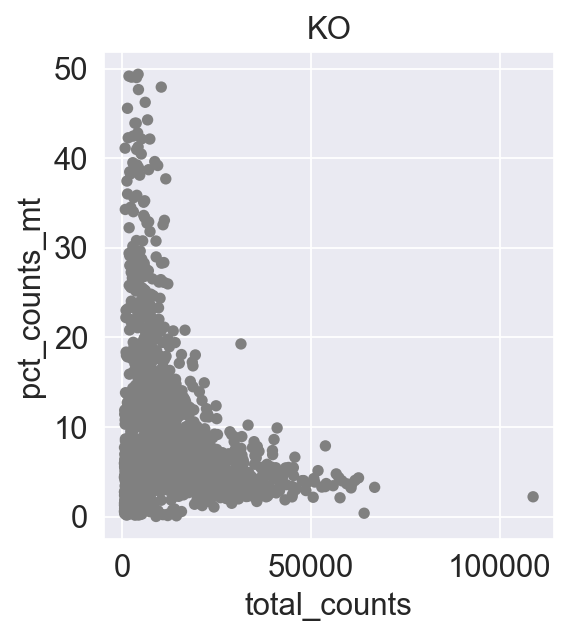

In [32]:
sc.pl.scatter(adata_KO, x='total_counts', y='pct_counts_mt', title = 'KO')


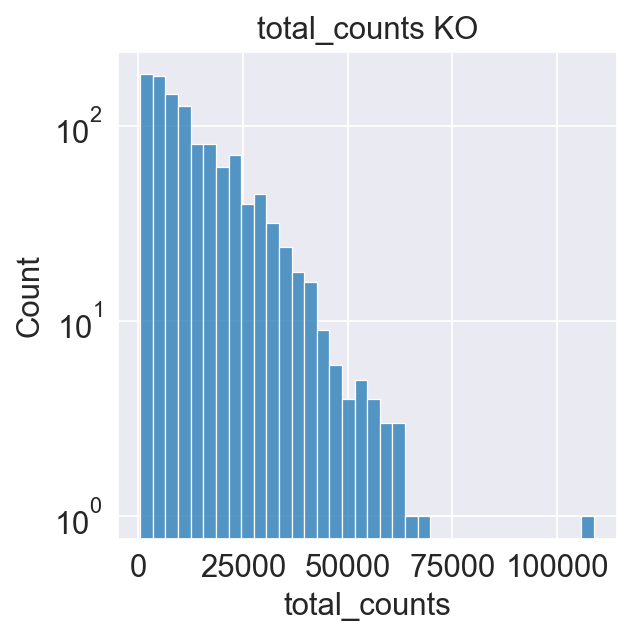

In [33]:
sns.set_style('darkgrid')


sns.histplot(adata_KO.obs['total_counts'])
plt.title('total_counts KO')
plt.yscale('log')

In [34]:
sc.pp.filter_cells(adata_KO, max_counts=75000)

filtered out 1 cells that have more than 75000 counts


Trying to set attribute `.obs` of view, copying.


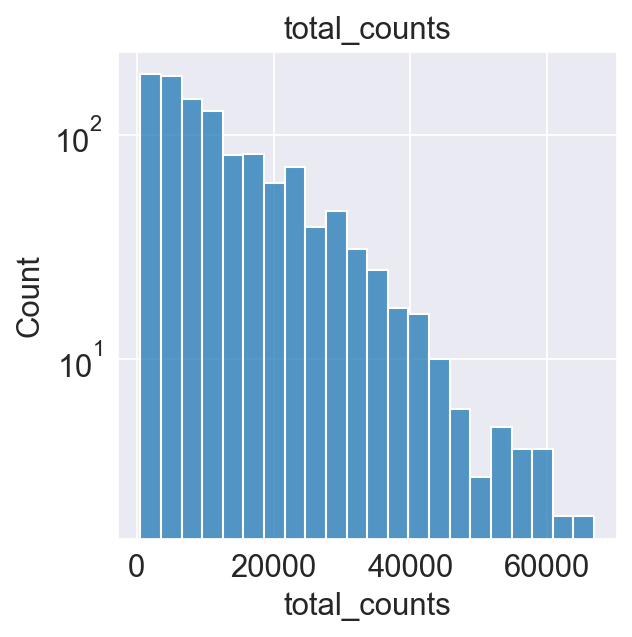

In [35]:
sns.set_style('darkgrid')


sns.histplot(adata_KO.obs['total_counts'])
plt.title('total_counts')
plt.yscale('log')

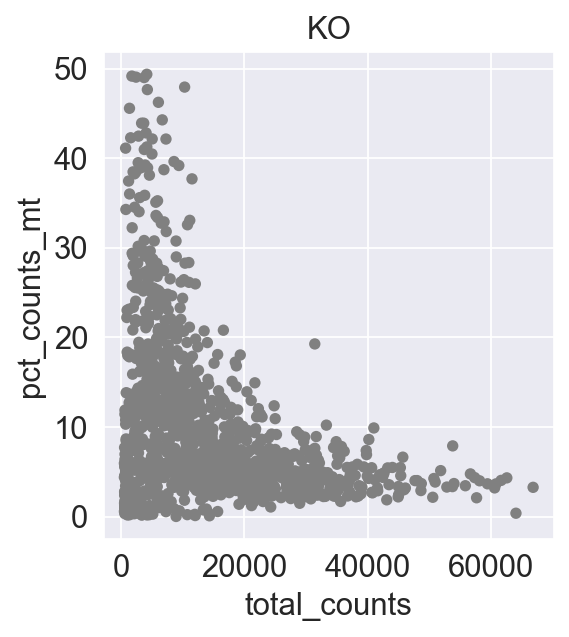

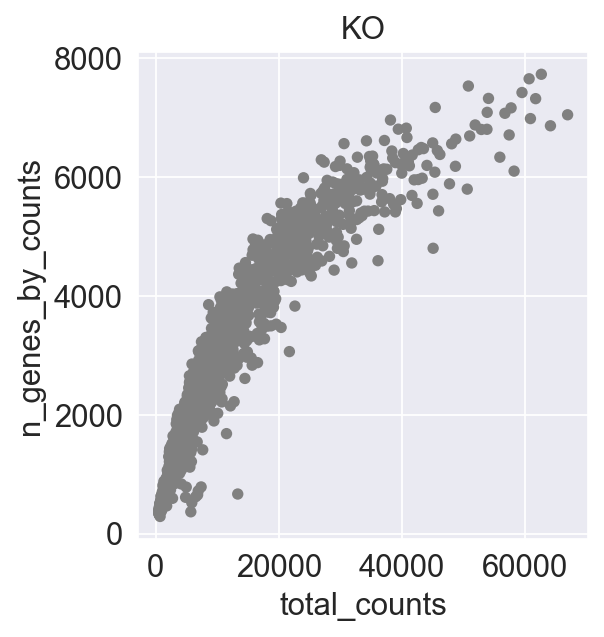

In [36]:
sc.pl.scatter(adata_KO, x='total_counts', y='pct_counts_mt', title = 'KO')
sc.pl.scatter(adata_KO, x='total_counts', y='n_genes_by_counts', title = 'KO')

Text(0.5, 1.0, 'total_counts KO')

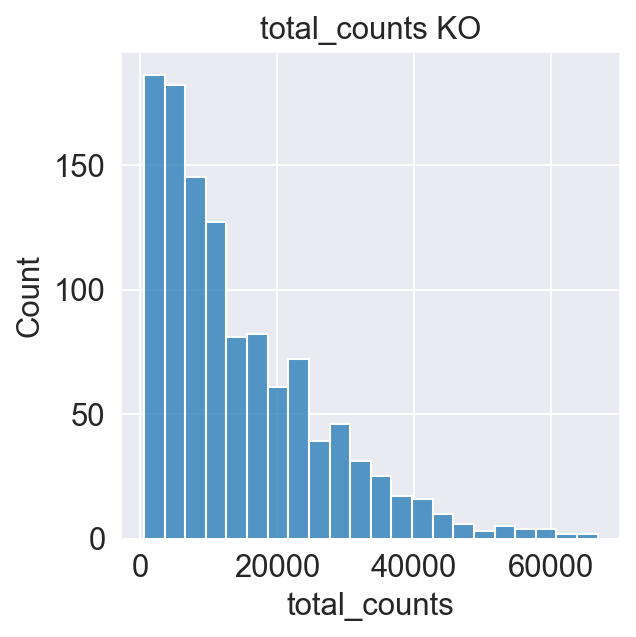

In [37]:
sns.set_style('darkgrid')


sns.histplot(adata_KO.obs['total_counts'])
plt.title('total_counts KO')

In [38]:
# Load the stored data object
save_file = './write/ddk_ko.h5ad'
adata_KO.write_h5ad(save_file)

In [39]:
adata_KO

AnnData object with n_obs × n_vars = 1146 × 31056
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [46]:
for batch in ['0', '1']:
    sc.pl.umap(adata, color='batch', groups=[batch])

NameError: name 'adata' is not defined